# TM10007 Assignment template

In [ ]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn

# Preprocessing
from sklearn import model_selection

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics.pairwise import rbf_kernel, sigmoid_kernel
from sklearn.model_selection import GridSearchCV, StratifiedKFold 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from scipy.stats import randint

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [2]:
from worclipo.load_data import load_data

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')
print(data)

The number of samples: 115
The number of columns: 494
                  label  PREDICT_original_sf_compactness_avg_2.5D  \
ID                                                                  
Lipo-001_0  liposarcoma                                  0.368434   
Lipo-002_0  liposarcoma                                  0.660571   
Lipo-003_0       lipoma                                  0.365191   
Lipo-004_0  liposarcoma                                  0.372210   
Lipo-005_0       lipoma                                  0.369120   
...                 ...                                       ...   
Lipo-111_0       lipoma                                  0.244813   
Lipo-112_0  liposarcoma                                  0.197353   
Lipo-113_0  liposarcoma                                  0.307562   
Lipo-114_0       lipoma                                  0.577333   
Lipo-115_0  liposarcoma                                  0.635282   

            PREDICT_original_sf_compactness_std_

In [10]:
"""Check for duplicate patients""" 
duplicates = data[data.duplicated(keep=False)]  
data = data.drop_duplicates(keep='first')
print(f"Number of rows after checking for duplicates: {len(data)}")

Number of rows after checking for duplicates: 115


In [11]:
"""Check for missing values"""
data_missing_values = data.replace(' ', np.nan)                   
missing_values = data[data.isnull().any(axis=1)]         

if not missing_values.empty:
    print(f"Missing values; {missing_values}")
else:
    print("No missing values")


No missing values


In [ ]:
"""Splitting the data into a test and training dataset: outer cross-validation"""
data_train, data_test = model_selection.train_test_split(data, test_size=0.20, random_state=42)
print(f'The number of samples train: {len(data_train.index)}')
print(f'The number of columns train: {len(data_train.columns)}')
print(f'The number of samples test: {len(data_test.index)}')
print(f'The number of columns test: {len(data_test.columns)}')

The number of samples train: 92
The number of columns train: 494
The number of samples test: 23
The number of columns test: 494


In [ ]:
"""Detect and replace outliers"""
from outliers import outlier_detection
data_train, total_outliers = outlier_detection(data_train)
print("\nTotal number of captured outliers in the train data:", total_outliers)

# dit moet dus wellicht nog op basis van de outliers van de train data 
data_test, total_outliers = outlier_detection(data_test)
print("\nTotal number of captured outliers in the test data:", total_outliers)

c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(data[column])
c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(data[column])
c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(data[column])
c


Total number of captured outliers in the train data: 757


c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(data[column])
c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(data[column])
c:\Users\robin\Documents\Technical medicine\TM10007 Machine Learning\Group assignment\TM10007_ML_Project_group_9\outliers.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = zscore(data[column])
c


Total number of captured outliers in the test data: 167


In [15]:
from prepro_data import processing_data_scaling
#This data is scaled and a variance and correlation threshold are applied
data_scaled, df_label, df_processed= processing_data_scaling(data_train)
print(data_scaled)

                  label         0         1         2         3         4  \
ID                                                                          
Lipo-005_0       lipoma  1.921417  2.315834 -0.736982 -0.290890 -0.409274   
Lipo-074_0  liposarcoma -0.685294 -0.823478 -0.554437 -0.610182 -0.106860   
Lipo-067_0       lipoma  0.279696  0.391968 -0.660010 -0.040937 -0.192921   
Lipo-029_0       lipoma -0.316884  0.667514 -0.568302 -0.513173 -0.518634   
Lipo-107_0       lipoma -0.117269 -0.068662 -0.688286 -0.805181 -0.815292   
...                 ...       ...       ...       ...       ...       ...   
Lipo-023_0       lipoma  2.737811  2.141099 -0.615020 -0.134420 -0.298802   
Lipo-007_0       lipoma -0.054504  0.025339  1.503650 -0.509755 -0.244239   
Lipo-016_0  liposarcoma  0.219639 -0.926086 -0.372904  1.657991  3.072081   
Lipo-114_0       lipoma -0.380791 -0.414516 -0.712835 -0.605804 -0.751211   
Lipo-112_0  liposarcoma -0.040714 -0.078312 -0.794512 -0.642981 -0.613955   

In [ ]:
from prepro_data import processing_data_pca
#This data is scaled, a variance and correlation threshold are applied, 
# and PCA brought back the number of features to 36
#dit kan er dan miss uit 
data_pca, df_label, df_processed= processing_data_pca(data_train)
print(data_pca)
print(df_label)
print(df_processed)

                  label         0         1         2         3         4  \
ID                                                                          
Lipo-005_0       lipoma  7.223142 -5.145124  2.786519  2.633082 -0.184627   
Lipo-074_0  liposarcoma  1.426626  0.263551  4.646864  9.349612  2.413114   
Lipo-067_0       lipoma  5.312380  0.619960  2.359050 -1.374727 -1.319872   
Lipo-029_0       lipoma  1.343635  7.798924  1.334363 -0.428428 -1.194929   
Lipo-107_0       lipoma  2.352971 -0.082959  3.080177 -3.346881  1.484747   
...                 ...       ...       ...       ...       ...       ...   
Lipo-023_0       lipoma  8.494972 -7.183452 -0.113732 -1.015270  2.913169   
Lipo-007_0       lipoma  0.605515 -1.079458  3.255947 -2.918203 -0.292731   
Lipo-016_0  liposarcoma  8.284447  1.625876 -1.362887 -3.679781  1.490255   
Lipo-114_0       lipoma -3.045681 -1.154044  1.350011 -1.910476  2.310093   
Lipo-112_0  liposarcoma  2.446778 -0.796755 -3.568387 -0.243945 -0.806377   

                 3         4         13        14        19        20   \
ID                                                                       
Lipo-005_0 -0.290890 -0.409274  0.782717  0.131574  1.319153  2.011709   
Lipo-074_0 -0.610182 -0.106860 -0.306692  3.070783 -0.722998  0.666905   
Lipo-067_0 -0.040937 -0.192921 -0.633515 -0.472438 -0.139526 -0.308241   
Lipo-029_0 -0.513173 -0.518634 -0.306692 -0.293326  1.027418 -0.439518   
Lipo-107_0 -0.805181 -0.815292  1.218480 -0.495959 -0.139526 -0.462077   
...              ...       ...       ...       ...       ...       ...   
Lipo-023_0 -0.134420 -0.298802  1.000599 -0.679279  0.152210  0.702840   
Lipo-007_0 -0.509755 -0.244239  1.000599 -0.683061  1.027418 -0.282052   
Lipo-016_0  1.657991  3.072081 -1.396101 -1.153846  0.152210 -0.373238   
Lipo-114_0 -0.605804 -0.751211  1.545303 -0.668494  0.443946 -0.554360   
Lipo-112_0 -0.642981 -0.613955 -1.613983 -0.152092 -1.014733 -0.373044   

                 22        24        

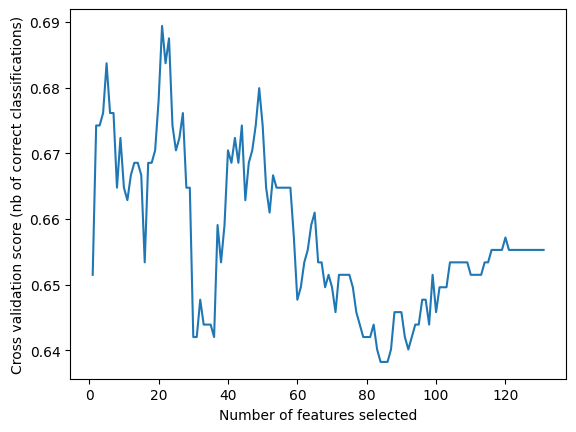

In [19]:
from prepro_data import processing_data_rfecv
#This data is scaled, a variance and correlation threshold are applied,
# and RFECV brought back the number of features to 61 (takes a bit longer to run)
data_rf, df_label, df_processed= processing_data_rfecv(data_train)
print(data_rf)

In [28]:
"""Support Vector Machine"""
# Split data into features and labels
X = data_rf.drop(data_rf.columns[[0, 1]], axis=1)  # Features
Y = df_label['label']  # Labels

# Set up the parameter grid for GridSearchCV
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [3, 4, 5], 'gamma': ['scale', 'auto', 0.1, 1], 'coef0': [0.0, 0.1, 0.5]},
]

# Set up the SVM classifier
svm_classifier = SVC(random_state=42, probability=True)  # Enable probability for AUC calculation

# Set up inner cross-validation for hyperparameter tuning
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(
    estimator=svm_classifier,
    param_grid=param_grid,
    scoring='roc_auc',         # Optimize AUC score
    refit=True,                # Refit best model on full training data
    cv=inner_cv,
    n_jobs=-1,
    verbose=1
)

# Perform the grid search on the training data to find the best hyperparameters
grid_search.fit(X, Y)

# Get the best model (with the best hyperparameters)
best_model_svm = grid_search.best_estimator_

# Make predictions to evaluate performance
y_pred = best_model_svm.predict(X)
y_pred_proba = best_model_svm.predict_proba(X)[:, 1]  # Probability estimates for AUC

# Convert categorical labels to numerical labels (0 or 1)
le = LabelEncoder()
Y = le.fit_transform(Y)  # 'lipoma' -> 0, 'liposarcoma' -> 1

# Ensure predictions are also numerical
y_pred = best_model_svm.predict(X)
y_pred = le.transform(y_pred)  # Convert categorical predictions ('lipoma', 'liposarcoma') to 0 and 1

# Calculate evaluation metrics
auc_score = roc_auc_score(Y, y_pred_proba)

# Print results
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Training AUC: {auc_score:.4f}")

Fitting 5 folds for each of 123 candidates, totalling 615 fits
Best hyperparameters: {'C': 1, 'kernel': 'linear'}
Training AUC: 0.9825


In [ ]:
"""Random Forest Classifier"""
# Split data into features and labels
X = data_train.drop(data_train.columns[[0, 1]], axis=1)  # Features
Y = df_label['label']  # Labels

# Convert categorical labels to numerical labels (0 or 1)
le = LabelEncoder()
Y = le.fit_transform(Y)  # e.g., 'lipoma' -> 0, 'liposarcoma' -> 1

# Set up parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Inner CV for hyperparameter tuning
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV to search for best hyperparameters
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='roc_auc',
    refit=True,
    cv=inner_cv,
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X, Y)

# Best model after Grid Search
best_model_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_model_rf.predict(X)
y_pred_proba = best_model_rf.predict_proba(X)[:, 1]  # Probability for positive class

# Evaluate model performance
auc_score = roc_auc_score(Y, y_pred_proba)

# Print results
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Training AUC: {auc_score:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training AUC: 1.0000


In [ ]:
"""KNNeighbour classifier"""
# Split data into features and labels
X = data_rf.drop(data_rf.columns[[0, 1]], axis=1)  # Features (excluding first two columns)
Y = df_label['label']  # Labels

# Set up the parameter grid for GridSearchCV (for KNN, we mainly tune 'n_neighbors', 'weights', and 'metric')
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Trying different values for k (number of neighbors)
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics to use
}

# Set up the KNN classifier
knn_classifier = KNeighborsClassifier()  # KNN classifier

# Set up inner cross-validation for hyperparameter tuning
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(
    estimator=knn_classifier, 
    param_grid=param_grid, 
    cv=inner_cv, 
    n_jobs=-1, 
    verbose=1, 
    scoring='roc_auc',         # Optimize AUC score
    refit=True,                # Refit best model on full training data
)

# Perform the grid search on the training data to find the best hyperparameters
grid_search.fit(X, Y)

# Get the best model (with the best hyperparameters)
best_model_knn = grid_search.best_estimator_

# Make predictions to evaluate performance
y_pred = best_model_knn.predict(X)
y_pred_proba = best_model_knn.predict_proba(X)[:, 1]  # Probability estimates for AUC

# Convert categorical labels to numerical labels (0 or 1)
le = LabelEncoder()
Y = le.fit_transform(Y)  # 'lipoma' -> 0, 'liposarcoma' -> 1

# Ensure predictions are also numerical
y_pred = best_model_knn.predict(X)
y_pred = le.transform(y_pred)  # Convert categorical predictions ('lipoma', 'liposarcoma') to 0 and 1

# Calculate evaluation metrics
auc_score = roc_auc_score(Y, y_pred_proba)

# Print results
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Training AUC: {auc_score:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Training AUC: 1.0000


In [ ]:
"""Testing the classifiers on the test data"""
#use best_model_svm + best_model_rf + best_model_knn for this
#use this scores: F1 score, AUC, accuracy, precision, recall 